# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved bruk av Euler-Cromer-metoden. Bli kjent med SciPy-bibliotekets og dens IVP-løser.

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte med tiden. Det kan derfor være ønskelig å benytte en annen ODE-løser for å få en bedre løsning, uten å måtte bruke en veldig liten steglengde.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\dot{\theta}_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [27]:
import numpy as np                # Importing numpy as np
import matplotlib.pyplot as plt   # Importing matplotlib.pyplot for plotting 
from scipy import integrate       # Importing integrate package from SciPy


%matplotlib inline

newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
# figure.figsize sets the size of the figure (values are in inches)
# axes.grid, set to False means that there is no grid
# lines.linewidth sets the thickness of the lines in the plot
# font.size sets the size of the text (ticks, title, xlabel, etc.)
# mathtext.fontset sets the font of the text of the type r'$tekst$' (math text)
# font.family sets the font of ordinary text (ticks, title, xlabel, etc.)

# There are several other parameters you can change, and you can look them up in the documentation 
# for matplotlib if you need to change any. 

plt.rcParams.update(newparams) # Updates the parametere set above. 

m = 5                   # [kg], mass
l = 1.0                 # [m], length of string
g = 9.8                 # [m/s^2], tyngdeakselerasjonen
theta_0 = 0.2           # [rad], initial angular displacement
w_0 = 0.0               # [rad/s], initial angular velocity

T = 10.0                # [s], evaluate up to T

In [28]:
def euler_cromer_approx(theta_0, theta_dot_0, dt, T):
    """
    Calculates angular displacement and angular velocity using the Euler method.

    theta_0: initial angular displacement
    theta_dot_0: initial angular velocity (omega) 
    dt: timestep
    T: max T
    """
    t = np.arange(0, T+dt/2, dt) #Use arange so as to use the given timestep. Note that T might not correpond to a whole number of timesteps dt
    n = t.shape[0] #Get the number of elements in t
    theta = np.empty(n) #np.empty is slightly faster than np.zeros, since we are going to fill all the values anyways      
    w = np.empty(n)
    theta[0] = theta_0           
    w[0] = theta_dot_0           
    for i in range(n-1):           
        w[i+1] = w[i] - g/l*theta[i]*dt 
        theta[i+1] = theta[i] + w[i+1]*dt # Using the next w-value in Euler-Cromer
    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    return theta, w, t

**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til sluttiden $T = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b) til å regne ut energien fra Euler-Cromer metoden. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er bevart over en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 

5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

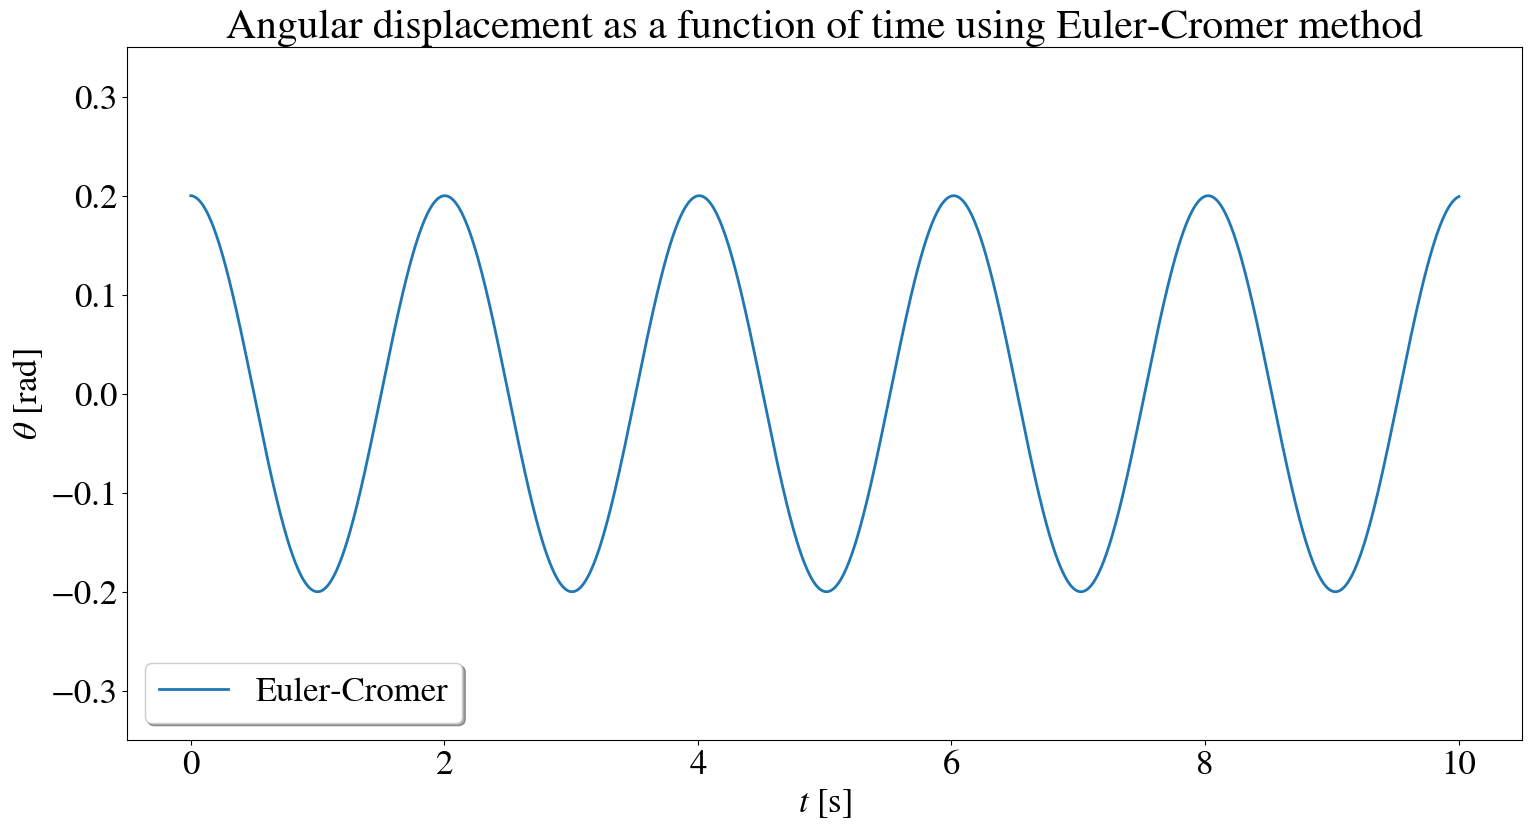

In [29]:
#1)
dt = 0.007              # [s], timestep
theta_approx, w_approx, t_approx = euler_cromer_approx(theta_0, w_0, dt, T) # Calculates theta, w and t.

# Plotting angular displacement as a function of time using the Euler-Cromer method
plt.plot(t_approx, theta_approx, label="Euler-Cromer") 
plt.xlabel('$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(-0.35, 0.35)            # Changes min and max y-values thats shown in the plot 
plt.legend(loc=3, shadow = True)
plt.title("Angular displacement as a function of time using Euler-Cromer method")
plt.show()

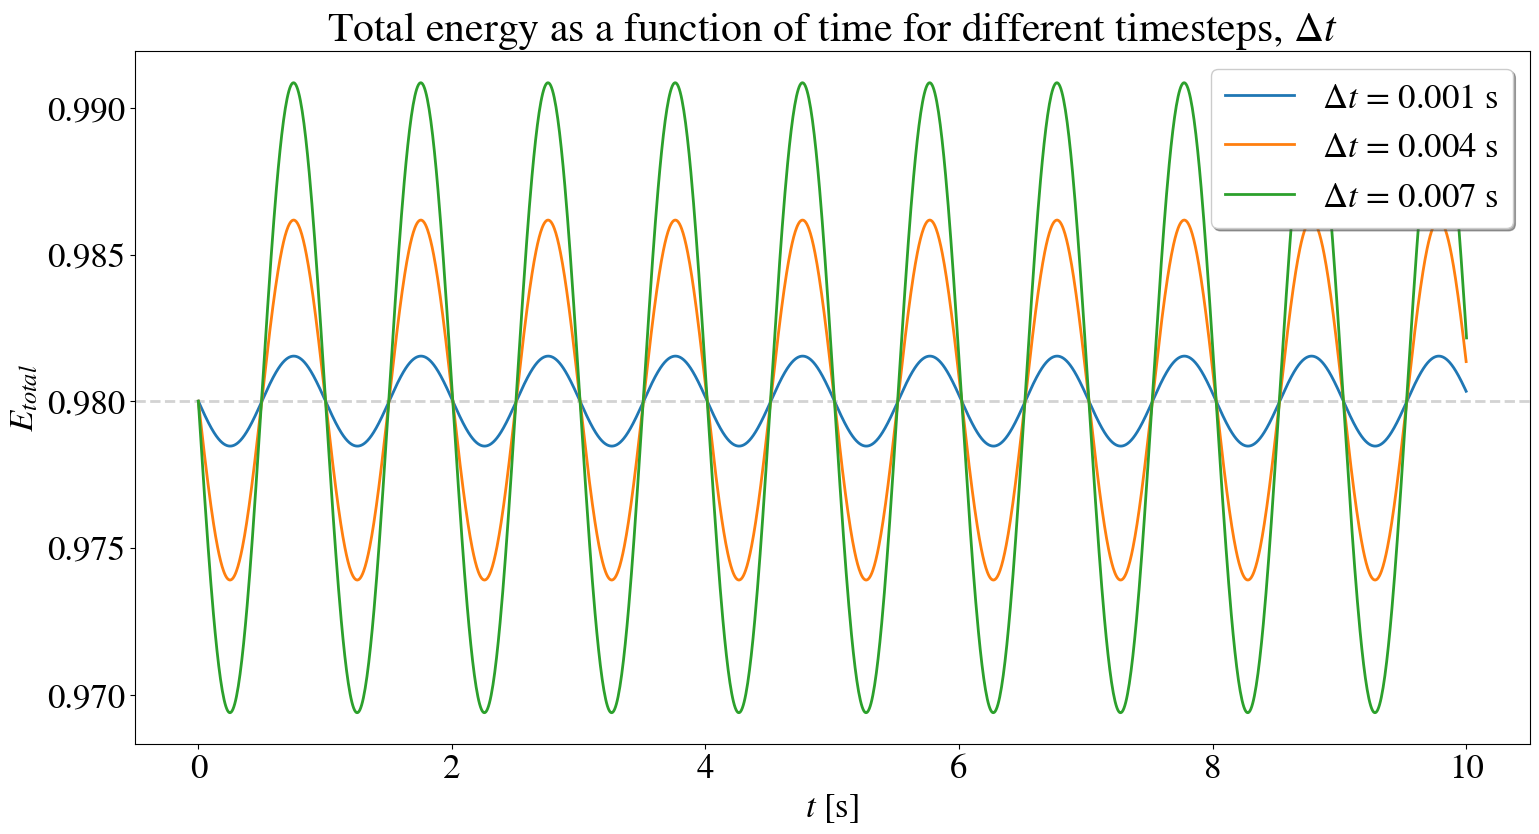

In [30]:
#2)
def energy_calculation(theta, w):
    """
    Calculates total energy for each time which theta and omega is calculated for. 
    Assumes that the shapes of theta and w are compatible.
    
    theta: array of theta-values for the angular displacement
    w: array of w-values for the angular velocity
    """
    
    E_total = 1/2*m*g*l*theta**2 + 1/2*m*l**2*w**2 # Calculates total energy for theta and w at same index (this creates an array)
        
    """
    E_total: array with the total energy found from values of theta and w (omega)
    """
    
    
    return E_total 

# Calculates total energy for different timesteps
theta_1, w_1, t_1 = euler_cromer_approx(theta_0, w_0, 0.001, T)
E_total_1 = energy_calculation(theta_1, w_1)

theta_2, w_2, t_2 = euler_cromer_approx(theta_0, w_0, 0.004, T)
E_total_2 = energy_calculation(theta_2, w_2)

theta_3, w_3, t_3 = euler_cromer_approx(theta_0, w_0, 0.007, T)
E_total_3 = energy_calculation(theta_3, w_3)

# Inkluderer en rett-linje med verdiene til intiell energi
# (does not need to be included, but illustrates the periodicity)
plt.axhline(E_total_1[0], c="lightgrey", ls="--")

plt.plot(t_1, E_total_1, label=r'$\Delta t$ = 0.001 s')
plt.plot(t_2, E_total_2, label=r'$\Delta t$ = 0.004 s')
plt.plot(t_3, E_total_3, label=r'$\Delta t$ = 0.007 s')
plt.xlabel('$t$ [s]')
plt.ylabel(r'$E_{total}$')
plt.legend(shadow=True)
plt.title(r'Total energy as a function of time for different timesteps, $\Delta t$')
plt.show()

In [31]:
#3)
Tp = 2*np.pi*np.sqrt(l/g)  # Calculating for time up to one completed period. 
theta, w, t = euler_cromer_approx(theta_0, w_0, 0.001, Tp)
E_total = energy_calculation(theta, w)

E_diff = E_total[-1] - E_total[0] # Calculating the difference between value of last and first element in array
print(E_diff) # This difference will decrease for smaller timesteps, as the period of the numerical solution approaches the analytical period

8.557526364194601e-07


**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er svært vanlig at ligninger som beskriver fysiske systemer ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden for ligningen over. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med småvinkeltilnærmelsen ($\sin\theta\approx\theta$) sammen med vinkelutslaget som beregnet fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at småvinkeltilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

In [32]:
# 1)

def euler_cromer_exact(theta_0, theta_dot_0, dt, T):
    """
    Calculates angular displacement and angular velocity using the Euler method.

    theta_0: initial angular displacement
    theta_dot_0: initial angular velocity (omega) 
    dt: timestep
    T: max T
    """
    t = np.arange(0, T+dt/2, dt) #Use arange so as to use the given timestep. Note that T might not correpond to a whole number of timesteps dt
    n = t.shape[0] #Get the number of elements in t
    theta = np.empty(n) #np.empty is slightly faster than np.zeros, since we are going to fill all the values anyways      
    w = np.empty(n)
    theta[0] = theta_0           
    w[0] = theta_dot_0           
    for i in range(n-1):           
        w[i+1] = w[i] - g/l*np.sin(theta[i])*dt #Using sin(theta) instead of theta 
        theta[i+1] = theta[i] + w[i+1]*dt # Using the next w-value in Euler-Cromer
    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    return theta, w, t

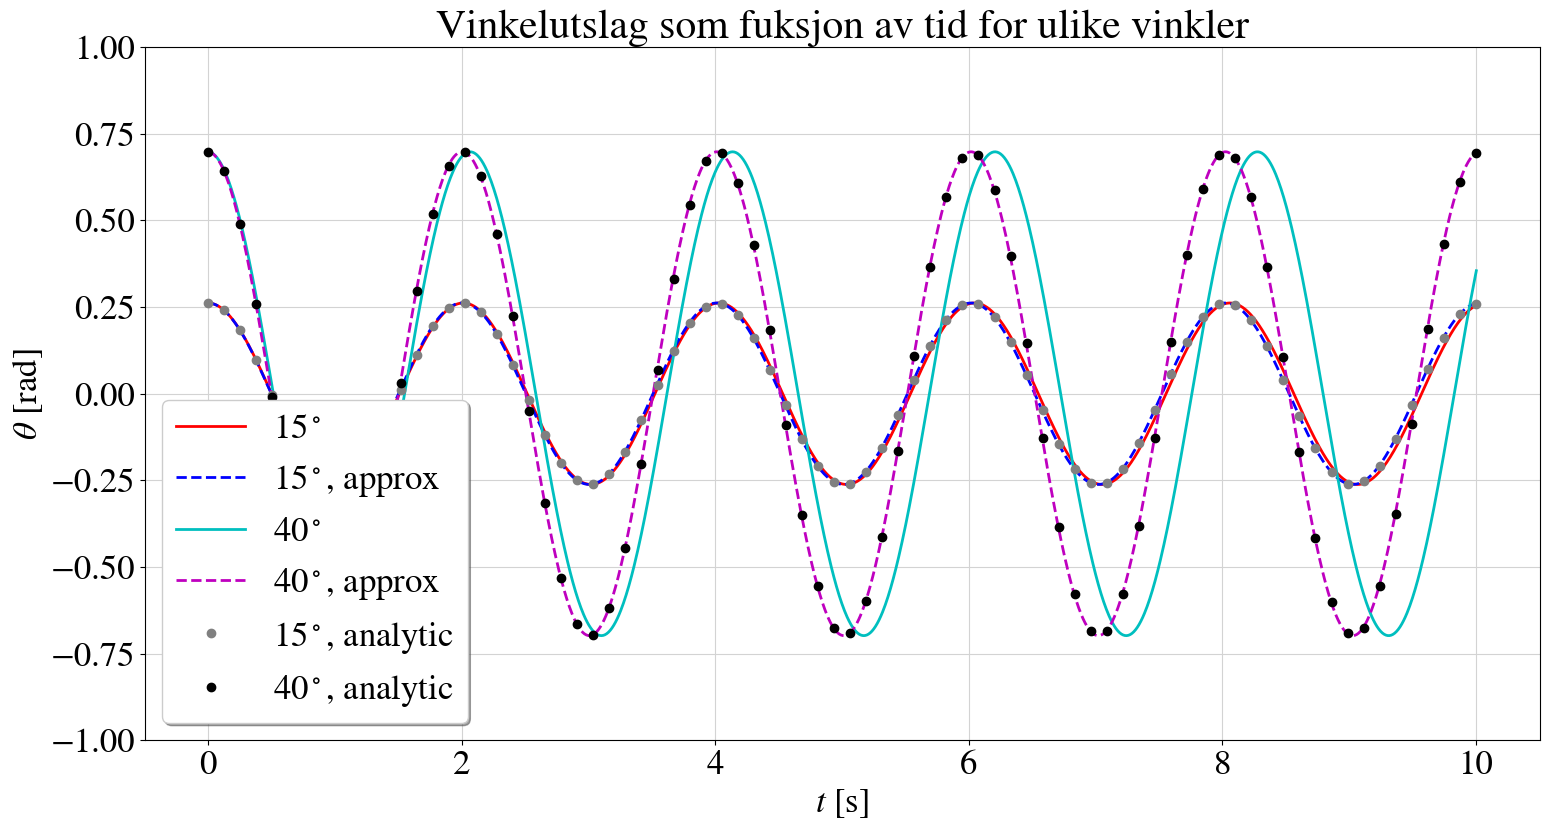

In [48]:
# 2) 

theta_15 = np.radians(15) # np.radians converts from degrees to radians. 
theta_40 = np.radians(40)

# Calculates for 15 deg.
theta_ae15, w_ae15, t_ae15 = euler_cromer_exact(theta_15, w_0, dt, T)
theta_ap15, w_ap15, t_ap15 = euler_cromer_approx(theta_15, w_0, dt, T)

# Calculates for 40 deg.
theta_ae40, w_ae40, t_ae40 = euler_cromer_exact(theta_40, w_0, dt, T)
theta_ap40, w_ap40, t_ap40 = euler_cromer_approx(theta_40, w_0, dt, T)

plt.plot(t_ae15, theta_ae15, label = r'$15^\circ$', c="r", lw=2)
plt.plot(t_ap15, theta_ap15, label = r'$15^\circ$, approx', c="b", ls="--")
plt.plot(t_ae40, theta_ae40, label = r'$40^\circ$', c="c", lw=2)
plt.plot(t_ap40, theta_ap40, label = r'$40^\circ$, approx', c="m", ls="--")

# Also including the analytical solution in the small angle approximation
w = np.sqrt(g/l)
t_a = np.linspace(0, 10, 80)
plt.plot(t_a, theta_15*np.cos(w*t_a), c="grey", marker='o', ls="", label=r'$15^\circ$, analytic')
plt.plot(t_a, theta_40*np.cos(w*t_a), c="k", marker='o', ls="", label=r'$40^\circ$, analytic')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(-1, 1)
plt.legend(loc=3, shadow = True)
plt.title("Vinkelutslag som fuksjon av tid for ulike vinkler")
plt.grid(c="lightgrey")
plt.show()


# Observe that the difference between small-angle approximation and no approx solution increases for increasing angle
# (as expected).

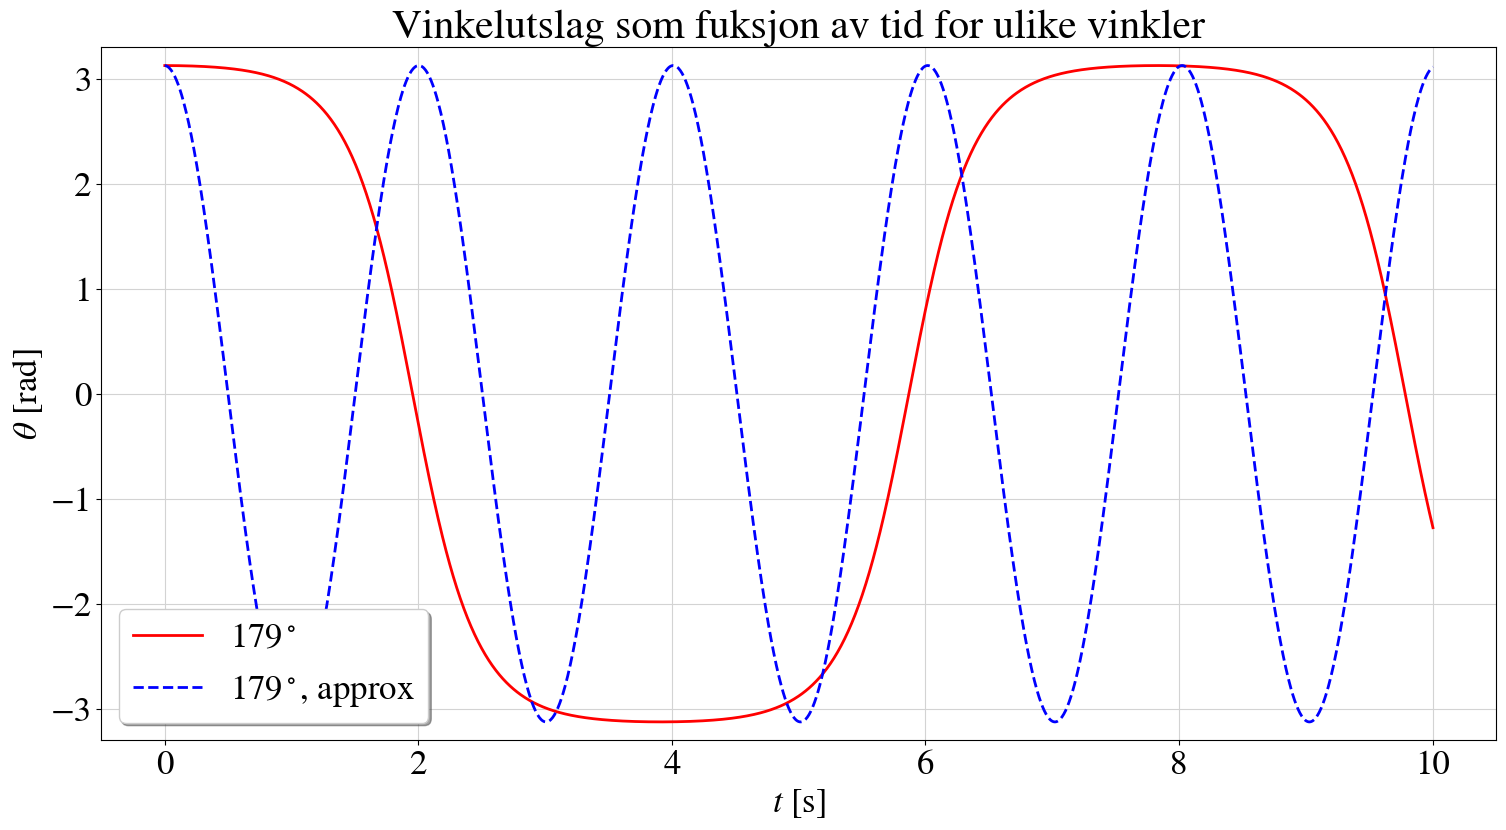

In [49]:
# 2 extra) Let us choose a large value close to 180 degrees to illustrate the non-linearity of the full solution 

theta_179 = np.radians(179) # np.radians converts from degrees to radians. 

theta_ac179, w_ac179, t_ac179 = euler_cromer_exact(theta_179, w_0, dt, T)
theta_ap179, w_ap179, t_ap179 = euler_cromer_approx(theta_179, w_0, dt, T)

plt.plot(t_ac179, theta_ac179, label = r'$179^\circ$', c="r", lw=2)
plt.plot(t_ap179, theta_ap179, label = r'$179^\circ$, approx', c="b", ls="--")

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(-np.pi*1.05, np.pi*1.05)
plt.legend(loc=3, shadow = True)
plt.title("Vinkelutslag som fuksjon av tid for ulike vinkler")
plt.grid(c="lightgrey")
plt.show()


##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så bør man lese gjennom funksjons-dokumentasjonen, for å lære seg hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Gruppeøvinger/Numerikk". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta, som vi vil komme tilbake til i numerisk øving 3) til å estimere feilen i hvert steg. Steglengden justeres deretter slik at usikkerheten blir mindre enn en gitt toleranse. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. I numerisk øving 1 viste dere hvordan en andreordens ODE kunne formuleres som *to* førsteordens ODE'er
\begin{align}
    \frac{\text{d}\theta}{\text{d}t}&=f_1(t, \theta, \omega)\\
    \frac{\text{d}\omega}{\text{d}t}&=f_2(t, \theta, \omega).
\end{align}
I likhet med et vilkårlig sett av førsteordens differensialligninger kan dette generelt skrives kompakt på vektorform
\begin{equation}
    \frac{\text{d}\boldsymbol{x}}{\text{d}t}=\boldsymbol{f}(t,\boldsymbol{x}),
\end{equation}
hvor i vårt tilfelle $\boldsymbol{x}=(\theta,\omega)$ og $\boldsymbol{f}=(f_1,f_2)$. `solve_ivp` bruker nettopp denne formuleringen, slik at både funksjonen $f$ og variabelen $y$ vil være en vektor når vi ønsker å løse for et sett med førsteordens ODE'er.

**a)** Lag en funksjon som tar inn en float `t`, og et array `x`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmoniske pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 

(Det kan være verdt å merke seg til senere at det er mulig å gi solve_ivp flere variabler enn de som diff.ligningen løser for ved å bruke `args`-parameteren)


In [51]:
def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    dw = -g/l*np.sin(vals[0])
    dtheta = vals[1]
    return [dtheta, dw]

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $T = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\dot{\theta}_0 = 0.0$ rad/s.

In [52]:
def RK45_method(RHS, theta_0, w_0, t_1, dt):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    RHS: right hand side of differential equations
    t_1: time-value to calculate up to (e.g. 10 seconds)
    dt: timestep
    
    Returns
    -------
    theta: array of theta values
    w: array of omega values
    t: timevalues
    """
    
    init_values = [theta_0, w_0]    # List of initial values of theta and w (omega)
    t_span = [0, t_1+dt]            # List of start and end time to calculate up to
    t = np.arange(0, t_1 + dt, dt)  # Array of values from 0 to t_1, with dt as stepsize between values
    theta12 = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', t_eval = t) # Using function from SciPy
    theta = theta12.y[0, :] # Array of angular displacement
    w = theta12.y[1, :]     # Array of angular velocity
    t = theta12.t           # Array of times evaluated
    return theta, w, t 

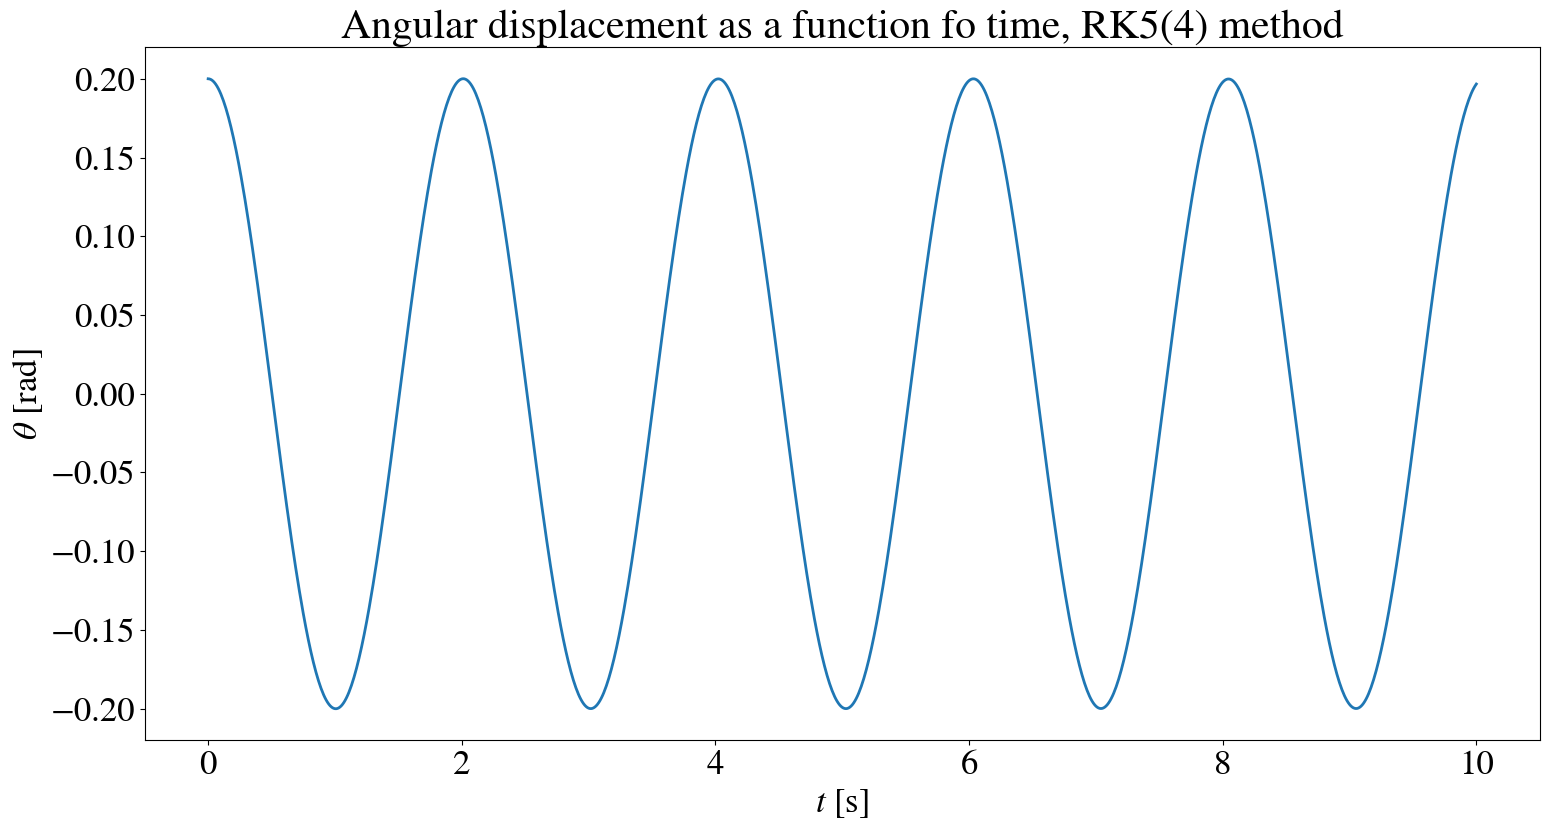

In [53]:
# Parameters 
t_0 = 0         # [s], start time
t_1 = 10        # [s], end time
dt = 0.01       # [s], timestep
theta_0 = 0.2   # [rad], intial anglular displacement
w_0 = 0.0       # [rad/s], intial angular velocity

theta, w, t = RK45_method(equation, theta_0, w_0, t_1, dt)
plt.plot(t, theta)
plt.xlabel('$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title("Angular displacement as a function fo time, RK5(4) method")
plt.show()